In [27]:
# Kütüphaneler

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error , r2_score , confusion_matrix , accuracy_score , roc_auc_score , roc_curve , classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler     # standardizasoyon işlemleri
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression


from warnings import filterwarnings
filterwarnings("ignore")     # önceki bölümlerde çalıştırdığımızda çıkan gereksiz uyarı mesajları çıkmasın diye

# Veri Setinin Eklenmesi ve İncelenmesi

In [8]:
df = pd.read_csv("diabetes.csv")
df.head()


# Bağımlı değişkenimiz "Outcome". Yani burada kişi diyabet hastası mı değil mi bunu inceliyoruz. 1, hasta ; 0, hasta değil

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
y = df["Outcome"]

x = df.drop(["Outcome"] , axis=1)

In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [46]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.30 , random_state=42)

# MODEL

In [47]:
loj_model = LogisticRegression(solver="liblinear").fit(x_train,y_train)

In [48]:
# modelin y'eksenini kestiği nokta
loj_model.intercept_

array([-5.78049392])

In [49]:
# modelin katsayıları yani ß katsayılarımız
loj_model.coef_

array([[ 0.06123373,  0.02620244, -0.01664294, -0.00217906, -0.00028314,
         0.06435561,  0.25165128,  0.02213531]])

# TAHMİN

In [50]:
# Tahmin ettiğimiz y değerleri
loj_model.predict(x_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [21]:
# gerçek y değerleri
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

# MODEL TUNING (DOĞRULAMA)

In [52]:
y_pred = loj_model.predict(x_test)

confusion_matrix(y_test,y_pred) # bunun üzerinden yorumlamak zor olduğu için accuracy değerine bakacağız yüzde kaç doğru tahmin etmişiz.

array([[126,  25],
       [ 32,  48]], dtype=int64)

In [53]:
accuracy_score(y_test,y_pred)
# %77 oranla doğru tahmin etmiş modelimiz

0.7532467532467533

In [54]:
print(classification_report(y_test,y_pred))

# Bu fonks. ile de doğruluk değerlerimizi görebiliriz

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



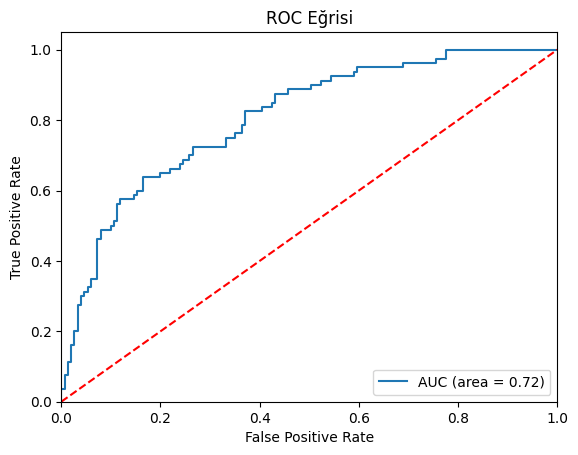

In [58]:
# ROC Eğrisini çizdirmek istersek:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba (x_test) [:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1] , [0,1] , 'r--') # kırmızı renkteki köşegen
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()